In [1]:
from scipy.optimize import fsolve # Used for solving a system of #K non-linear equations with #K unknows: Used for calibrating the price elastic demand
import numpy as np
import pandas as pd

In [2]:
βγ = 0.6
Q0 = 0
c = 1
δ = 0.9
RoC = (1-δ)*(1-βγ)/(1-βγ*(1-δ))
RoC

0.042553191489361694

In [3]:
T = 50
t_grid = np.linspace(0,T,T+1).astype(int)
Q_sol = np.linspace(0,T,T+1)
Q_sol[:] = Q0

In [5]:
def transition_eq(Q,*params):
    βγ,Q_minus,c,δ = params
#     return np.log(Q-δ*Q_minus) - βγ*np.log(Q)-c
    return Q-δ*Q_minus - Q**(βγ)*np.exp(c)
def transition_eq2(q,*params):
    βγ,Q_minus,c,δ = params
    return np.log(q)-βγ*np.log(q+δ*Q_minus)-c

In [38]:
Q̄ = (βγ)**(1/(1-βγ))*np.exp(c/(1-βγ))
for t in t_grid[1:]:
    if t==1:
        Q_1 = np.exp(c/(1-βγ))
        Q_sol[t] = (βγ)**(1/(1-βγ))*Q_1-np.finfo(float).eps*10**12 #fsolve(transition_eq,x0=Q0,args=(βγ,Q0,c,δ)) #
    else:
        if Q_sol[t-1]<Q̄:
            Q_sol[t] = δ*Q_sol[t-1]
        else:
            Q_sol[t] = fsolve(transition_eq,x0=Q_sol[t-1],args=(βγ,Q_sol[t-1],c,δ))[0]
df = pd.Series(Q_sol,index=pd.Index(t_grid,name='t'),name='Q')
df2 = pd.Series(Q_sol[1:],index=pd.Index(Q_sol[0:-1],name='Q_minus'),name='Q')

<AxesSubplot:xlabel='t'>

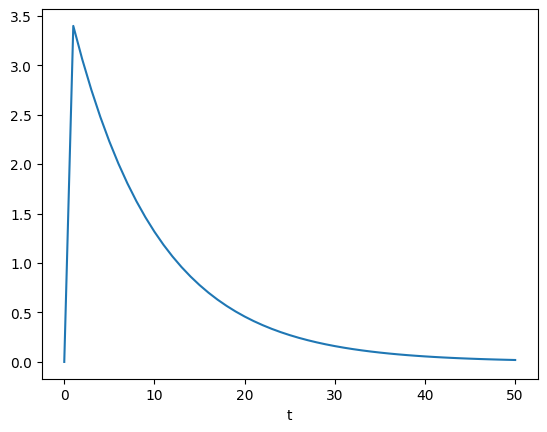

In [39]:
df.plot()

In [56]:
Q_1 = np.exp(0/(1-βγ))
ϵ = np.finfo(float).eps
Q̄ = (βγ)**(1/(1-βγ))*Q_1-ϵ*10**8
Q_tmp = 2
Q_grid = np.concatenate((np.linspace(np.finfo(float).eps,Q̄-ϵ,100),np.array([Q̄]),np.linspace(Q̄+ϵ,Q_tmp,100)))
F = [transition_eq(Q,*(βγ,Q̄,c,δ)) for Q in Q_grid]


<AxesSubplot:xlabel='Q_t-1'>

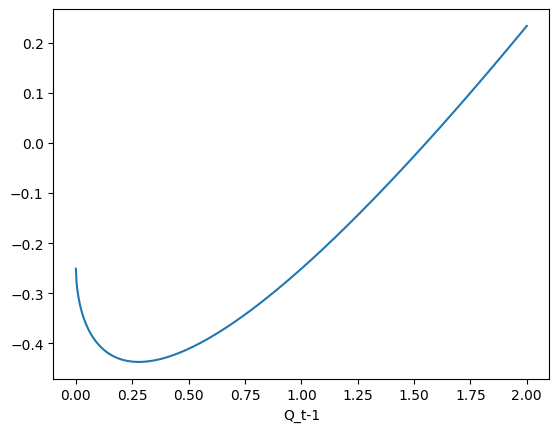

In [57]:
x = pd.Series(F,index=pd.Index(Q_grid,name='Q_t-1'),name='F')
x.plot()

<AxesSubplot:xlabel='Q_t-1'>

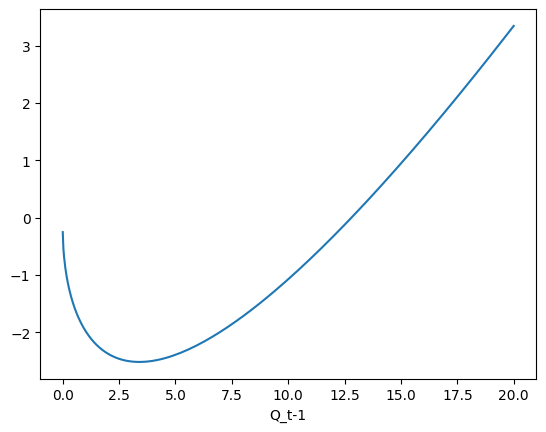

In [63]:
c=1
F = [transition_eq(Q,*(βγ,Q̄,c,δ)) for Q in Q_grid*10]
x = pd.Series(F,index=pd.Index(Q_grid*10,name='Q_t-1'),name='F')
x.plot()

In [64]:
Q̄

0.2788547787224735

In [22]:
Q_grid

array([2.22044605e-16, 2.81671494e-03, 5.63342987e-03, 8.45014481e-03,
       1.12668597e-02, 1.40835747e-02, 1.69002896e-02, 1.97170046e-02,
       2.25337195e-02, 2.53504344e-02, 2.81671494e-02, 3.09838643e-02,
       3.38005792e-02, 3.66172942e-02, 3.94340091e-02, 4.22507240e-02,
       4.50674390e-02, 4.78841539e-02, 5.07008689e-02, 5.35175838e-02,
       5.63342987e-02, 5.91510137e-02, 6.19677286e-02, 6.47844435e-02,
       6.76011585e-02, 7.04178734e-02, 7.32345884e-02, 7.60513033e-02,
       7.88680182e-02, 8.16847332e-02, 8.45014481e-02, 8.73181630e-02,
       9.01348780e-02, 9.29515929e-02, 9.57683078e-02, 9.85850228e-02,
       1.01401738e-01, 1.04218453e-01, 1.07035168e-01, 1.09851883e-01,
       1.12668597e-01, 1.15485312e-01, 1.18302027e-01, 1.21118742e-01,
       1.23935457e-01, 1.26752172e-01, 1.29568887e-01, 1.32385602e-01,
       1.35202317e-01, 1.38019032e-01, 1.40835747e-01, 1.43652462e-01,
       1.46469177e-01, 1.49285892e-01, 1.52102607e-01, 1.54919322e-01,
      

In [ ]:
c